# Setup

In [94]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [95]:
import pandas as pd
pd.set_option("display.max_rows", 14, "display.max_columns", None)

# Get the data

In [169]:
mobile = pd.read_csv('train.csv')
test_main = pd.read_csv('test.csv', index_col=0)

## 0 value in 'sc_h', 'sc_w','battery_power' to Nan

In [170]:
test_main[['sc_h', 'sc_w','battery_power']] = test_main[['sc_h', 'sc_w','battery_power']].replace(0, float('nan'))
mobile[['sc_h', 'sc_w','battery_power']] = mobile[['sc_h', 'sc_w','battery_power']].replace(0, float('nan'))

In [171]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             1820 non-null float64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(3), int64(18)
memory usage: 328.2 KB


In [172]:
mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1820.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,6.337363,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.152062,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,6.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Saving figure attribute_histogram_plots


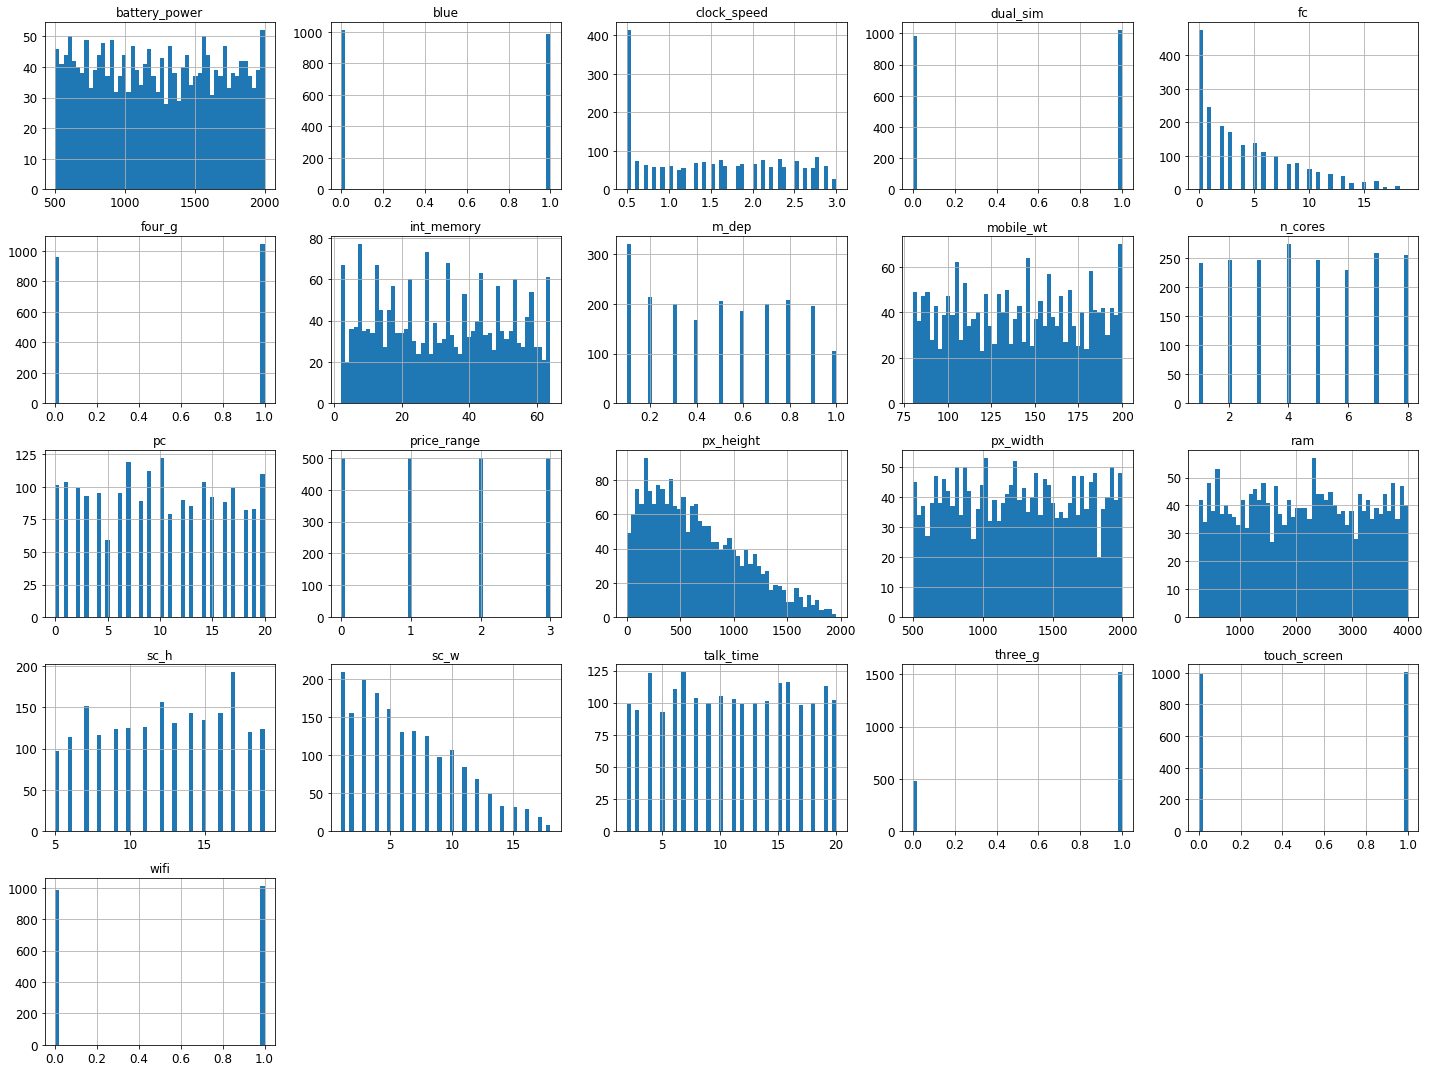

In [173]:
%matplotlib inline
import matplotlib.pyplot as plt
mobile.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [174]:
np.random.seed(42)

In [175]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(mobile, test_size=0.2, random_state=42)

In [176]:
train_set.shape

(1600, 21)

In [177]:
train_set['price_range'].value_counts()

1    409
2    408
0    395
3    388
Name: price_range, dtype: int64

In [178]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(mobile, mobile["price_range"]):
    strat_train_set = mobile.loc[train_index]
    strat_test_set = mobile.loc[test_index]

In [179]:
strat_train_set['price_range'].value_counts()

3    400
2    400
1    400
0    400
Name: price_range, dtype: int64

In [180]:
mobile = strat_train_set.copy()

In [181]:
mobile_test = strat_test_set.copy()

# Discover and visualize the data to gain insights

In [182]:
corr_matrix = mobile.corr()
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.917487
battery_power    0.200659
px_width         0.160864
px_height        0.136473
                   ...   
four_g           0.003916
n_cores          0.003791
clock_speed     -0.002633
touch_screen    -0.031865
mobile_wt       -0.040081
Name: price_range, Length: 21, dtype: float64

Saving figure schatter_matrix


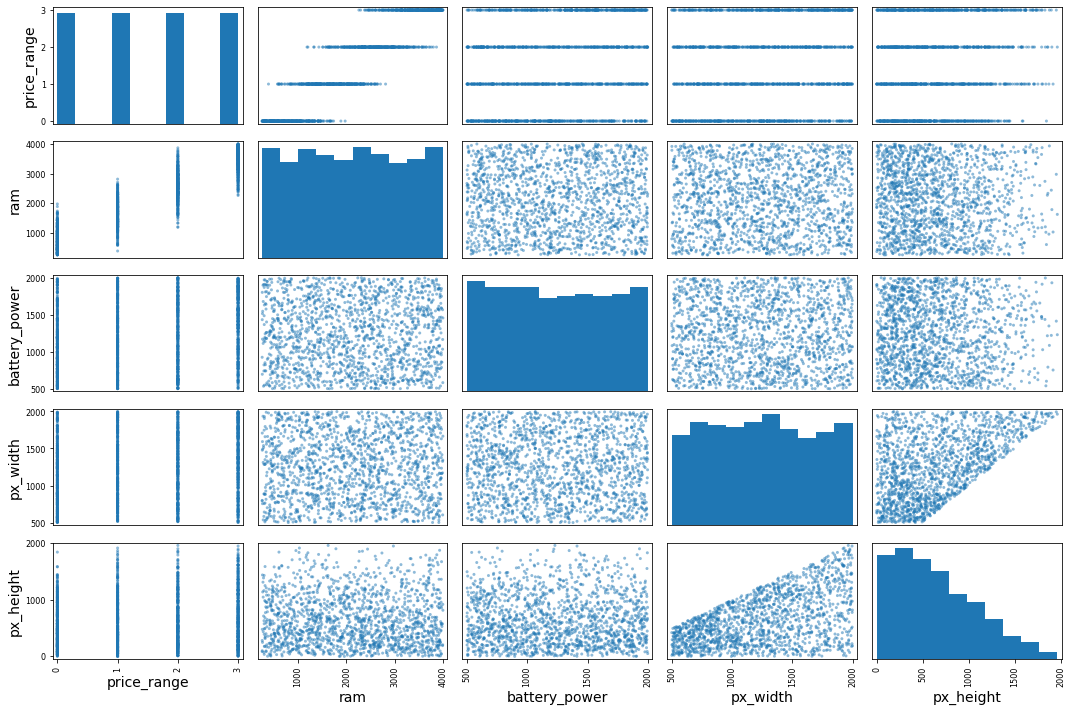

In [183]:
from pandas.plotting import scatter_matrix

attributes = ["price_range", "ram", "battery_power", "px_width", "px_height"]
scatter_matrix(mobile[attributes], figsize=(15,10));
save_fig("schatter_matrix")

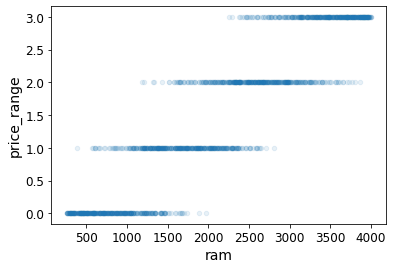

In [184]:
mobile.plot(kind='scatter', x='ram', y='price_range', alpha=.1);

In [185]:
corr_matrix = mobile.corr()
corr_matrix["price_range"].sort_values(ascending=False).head(10)

price_range      1.000000
ram              0.917487
battery_power    0.200659
px_width         0.160864
px_height        0.136473
int_memory       0.045113
pc               0.043061
sc_w             0.038381
sc_h             0.026417
dual_sim         0.021804
Name: price_range, dtype: float64

In [186]:
mobile = strat_train_set.drop("price_range", axis=1)
mobile_labels = strat_train_set["price_range"].copy()

In [187]:
mobile_test_labels = strat_test_set['price_range'].copy()
mobile_test = strat_test_set.drop("price_range", axis=1)

# Prepare the data for Machine Learning algorithms

In [188]:
#mobile_no_zero = mobile[mobile['sc_w']!=0.]
#sc_ratio = np.median(mobile_no_zero["sc_h"]/mobile_no_zero["sc_w"])
#mobile.loc[mobile.sc_w == 0.0, 'sc_w'] = mobile.loc[mobile.sc_w == 0.0, 'sc_h'] / sc_ratio

In [189]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "px_height", "px_width", "sc_h", "sc_w", "talk_time", "battery_power"
px_height_ix, px_width_ix, sc_h_ix, sc_w_ix, talk_time_ix, battery_power_ix = [
    mobile.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_att = True): # no *args or **kargs
        self.add_att = add_att
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        if self.add_att:
            px = X[:,px_height_ix]*X[:, px_width_ix]
            px_per_cm = (X[:,px_height_ix]*X[:,px_width_ix])/(X[:,sc_h_ix]*X[:,sc_w_ix])
            battery_efficiency = X[:,talk_time_ix]/X[:,battery_power_ix]
            return np.c_[X, px, px_per_cm, battery_efficiency]
        else:
            return np.c_[X]
        
attr_adder = CombinedAttributesAdder(add_att=True)
mobile_extra_attribs = attr_adder.transform(mobile.values)

In [190]:
mobile_extra_attribs = pd.DataFrame(
    mobile_extra_attribs,
    columns=list(mobile.columns)+["px", "px_per_cm", "battery_efficiency"],
    index=mobile.index)

In [191]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('min_max_scaler', MinMaxScaler()),
    ])

mobile_prepared = pipeline.fit_transform(mobile)

In [192]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance')
knn_clf.fit(mobile_prepared, mobile_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rf_clf = RandomForestClassifier(max_depth=10, random_state=42)
rf_clf.fit(mobile_prepared, mobile_labels)

dt_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_clf.fit(mobile_prepared, mobile_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [194]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(mobile_prepared, mobile_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [195]:
some_mobile = mobile_prepared[0]
some_mobile_scores = svm_clf.decision_function([some_mobile])
some_mobile_scores

array([[ 0.85885184,  3.22484187,  2.15651321, -0.22991499]])

In [196]:
from sklearn.model_selection import cross_val_score,  cross_val_predict
from sklearn.metrics import confusion_matrix

In [197]:
def cvs_clfs(data,labels, clfs = [rf_clf, dt_clf, svm_clf, knn_clf]):
    for clf in clfs:
        print(type(clf))
        print(np.mean(cross_val_score(clf, data, labels, cv=3, scoring="accuracy")))

# Conf matrix

In [198]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [199]:
mobile_labels_pred = cross_val_predict(svm_clf, mobile_prepared, mobile_labels, cv=3)
conf_mx = confusion_matrix(mobile_labels, mobile_labels_pred)
conf_mx

array([[342,  58,   0,   0],
       [ 23, 319,  58,   0],
       [  0,  68, 314,  18],
       [  0,   1,  77, 322]], dtype=int64)

In [200]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_plot


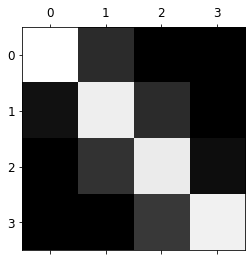

In [201]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Saving figure confusion_matrix_errors_plot


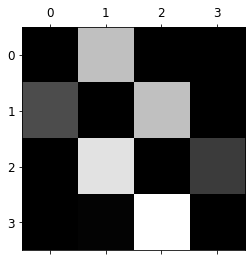

In [202]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

# Select and train a model 

In [203]:
cvs_clfs(mobile_prepared, mobile_labels)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.8587483281920113
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.8293690110626257
<class 'sklearn.svm._classes.SVC'>
0.8106154829914765
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
0.39687491948385345


In [204]:
mobile_test_prepared = pipeline.transform(mobile_test)

In [205]:
cvs_clfs(mobile_test_prepared, mobile_test_labels)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.7698911457748849
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.7175027120038903
<class 'sklearn.svm._classes.SVC'>
0.5124939213705907
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
0.31251636554071743


# Official test

In [206]:
test_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 20 columns):
battery_power    1000 non-null int64
blue             1000 non-null int64
clock_speed      1000 non-null float64
dual_sim         1000 non-null int64
fc               1000 non-null int64
four_g           1000 non-null int64
int_memory       1000 non-null int64
m_dep            1000 non-null float64
mobile_wt        1000 non-null int64
n_cores          1000 non-null int64
pc               1000 non-null int64
px_height        1000 non-null int64
px_width         1000 non-null int64
ram              1000 non-null int64
sc_h             1000 non-null int64
sc_w             888 non-null float64
talk_time        1000 non-null int64
three_g          1000 non-null int64
touch_screen     1000 non-null int64
wifi             1000 non-null int64
dtypes: float64(3), int64(17)
memory usage: 164.1 KB


In [207]:
test_main_prepared = pipeline.transform(test_main)

In [209]:
test_main_predict = rf_clf.predict(test_main_prepared)

In [210]:
test_main_predict

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 1, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 2, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 0, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       2, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 1, 3, 2, 3, 1, 0, 1,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 1, 2, 1, 0, 0, 1, 3, 1, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 3, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 0, 2, 3, 1,